In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.version)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
  print(module.__name__, module.__version__)

fashion_minst = keras.datasets.fashion_mnist

(x_train_all, y_train_all), (x_test, y_test) = fashion_minst.load_data()

x_valid, x_train = x_train_all = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 归一化之前的最大和最小值
print(np.max(x_train), np.min(x_train))

# normalization
# x = (x - u) / std, u 是均值 std 是方差，使数据呈现均值为 0，方差为 1 的正态分布

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)

x_valid_scaled = scaler.fit_transform(
    x_valid.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)

x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)

# 归一化之后的最大和最小值
print(np.max(x_train_scaled), np.min(x_train_scaled))

print('===============================')
print(x_train[0].size)
print('===============================')


<module 'tensorflow_core._api.v2.version' from '/opt/anaconda3/envs/tensorflow-2/lib/python3.7/site-packages/tensorflow_core/_api/v2/version/__init__.py'>
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.3
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
255 0
2.0231433 -0.8105136
784


In [ ]:
def show_single_image(img_arr):
  plt.imshow(img_arr, cmap="binary")
  plt.show()

def show_images(n_rows, n_cols, x_data, y_data, class_names):
  assert len(x_data) == len(y_data)
  assert n_rows * n_cols < len(x_data)
  plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
  for row in range(n_rows):
    for col in range(n_cols):
      index = n_cols * row + col
      plt.subplot(n_rows, n_cols, index + 1)
      plt.imshow(x_data[index], cmap="binary", interpolation = 'nearest')
      plt.axis('off')
      plt.title(class_names[y_data[index]])
  plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']

# show single or multiple images
show_single_image(x_train[0])
show_images(3, 5, x_train, y_train, class_names)

# sequential
# 全连接层和激活函数
# relu, y = max(0, x)
# softmax, 将向量变成概率分布 x = [x1, x2, x3], y = [e^x1 / sum, e^x2 / sum, e^x3 / sum], sum = e^x1 + e^x2 + e^x3
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape = [28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [4]:
# 查看模型层数和概况
# print(model.layers)
# print(model.summary())

history = model.fit(x_train_scaled, y_train, epochs=10, validation_data = (x_valid_scaled, y_valid))

type(history)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 126us/sample - loss: 0.9292 - accuracy: 0.6935 - val_loss: 0.6381 - val_accuracy: 0.7858
Epoch 2/10
55000/55000 [==============================] - 6s 103us/sample - loss: 0.5980 - accuracy: 0.7920 - val_loss: 0.5342 - val_accuracy: 0.8168
Epoch 3/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.5265 - accuracy: 0.8154 - val_loss: 0.4882 - val_accuracy: 0.8310
Epoch 4/10
55000/55000 [==============================] - 7s 118us/sample - loss: 0.4882 - accuracy: 0.8272 - val_loss: 0.4601 - val_accuracy: 0.8382
Epoch 5/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4627 - accuracy: 0.8365 - val_loss: 0.4428 - val_accuracy: 0.8454
Epoch 6/10
55000/55000 [==============================] - 7s 120us/sample - loss: 0.4441 - accuracy: 0.8430 - val_loss: 0.4272 - val_accuracy: 0.8496
Epoch 7/10
55000/55000 [===========================

tensorflow.python.keras.callbacks.History

In [ ]:
history.history

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

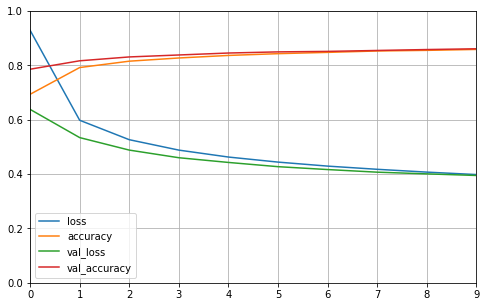

In [7]:
plot_learning_curves(history)

In [9]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4324027494907379, 0.8457]